In [1]:
!pip install fastai 'duckduckgo_search'


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 39.5 MB/s eta 0:00:00
  Attempting uninstall: click
    Found existing installation: click 8.1.7
    Uninstalling click-8.1.7:
      Successfully uninstalled click-8.1.7


In [2]:
from duckduckgo_search import DDGS
from fastcore.all import *

def search_images(RollsRoys_Cars, max_images=500): return L(DDGS().images(RollsRoys_Cars, max_results=max_images)).itemgot('image')
import time, json

In [3]:
urls = search_images('RollsRoys cars', max_images = 1)
urls[0]

'https://wallpaperaccess.com/full/423086.jpg'

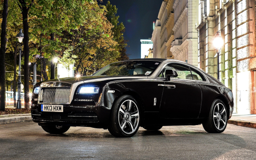

In [4]:
from fastdownload import download_url
dest = 'RollsRoys.jpg'
download_url(urls[0],dest, show_progress = True)

from fastai.vision.all import *
im = Image.open(dest)
im.to_thumb(256,256)

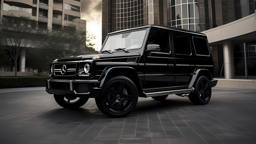

In [5]:
download_url(search_images('Gwgon images', max_images = 1)[0], 'Luxury_Car.jpg', show_progress= True)
Image.open('Luxury_Car.jpg').to_thumb(256,256)

In [6]:
searches = 'Luxury Cars Image', 'RollsRoys'
path = Path('RollsRoys_or_not')

for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok = True, parents = True)
    download_images(dest, urls = search_images(f'{o} photo'))
    time.sleep(5)
    resize_images(path/o, max_size = 400, dest=path/o)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in by

In [7]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

32

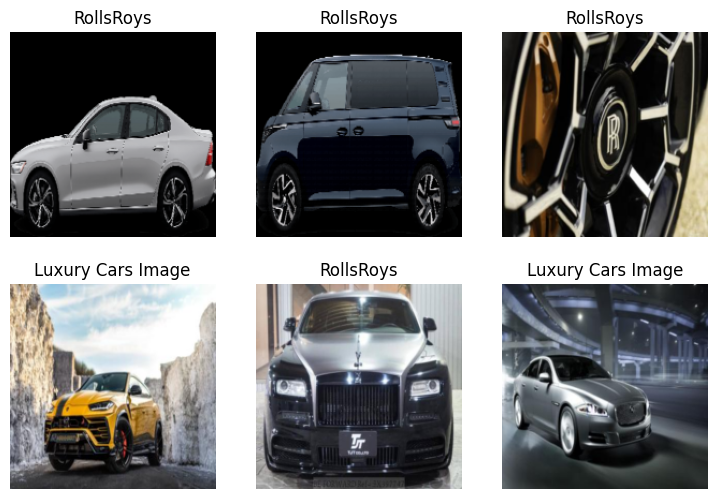

In [8]:
dls = DataBlock(

    blocks = (ImageBlock, CategoryBlock),
    get_items = get_image_files,
    splitter = RandomSplitter(valid_pct = 0.2, seed = 42),
    get_y = parent_label,
    item_tfms = [Resize(192, method = 'squish')]

).dataloaders(path, bs=32)

dls.show_batch(max_n = 6)

In [9]:
learn = vision_learner(dls, resnet101, metrics = error_rate)
learn.fine_tune(3)

Downloading: "https://download.pytorch.org/models/resnet101-cd907fc2.pth" to /root/.cache/torch/hub/checkpoints/resnet101-cd907fc2.pth
100%|██████████| 171M/171M [00:01<00:00, 169MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,1.082634,0.780543,0.250000,03:09


epoch,train_loss,valid_loss,error_rate,time
0,0.458008,0.851672,0.277778,04:24
1,0.352885,0.904800,0.229167,04:21
2,0.264999,0.812522,0.201389,04:21


In [10]:
is_RollsRoys, _, probs = learn.predict(PILImage.create('Luxury_Car.jpg'))
print(f"This is a: {is_RollsRoys}.")
print(f"Probability it's a RollsRoys: {probs[0]:.4f}")

This is a: RollsRoys.
Probability it's a RollsRoys: 0.1404
